# Introduction

In this notebook, I will build a Logistic Regression model with graident descent from scratch using Python. Then we are going to test our model wih scikit-learn's breast cancer dataset and its built-in Logistic Regression model. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Model Implementation

Logistic Regression is a predictive regression analysis to conduct when the dependent variable is dichotomous (binary). The goal of the analysis is to output a prediction of 0 or 1, which corresponds to the two classes we are trying to classify the data into. To accomplish this, a logistic regression model uses sigmoid function as its hypothesis function. 

**Sigmoid Function**

Sigmoid function is the hypothesis function for a Logistic Regression model. The eact formula of a sigmoid function is as follows:<br>
![](https://imgur.com/903IYoN.jpg)

Where:
* Θ is the weight.
* x is the input

The graph of a sigmoid function is as follows:<br>
![](https://miro.medium.com/max/3268/1*a04iKNbchayCAJ7-0QlesA.png)

In [2]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

**Loss Function**

As the graph suggests, if we find good parameters theta, the output will be close to 0 or 1 when receiving different input x. To do this, we want to find theta that makes the predicted y values as close to correct 0 or 1 value as possible. Therefore, our goal is to minimize this loss function:

![](https://i.stack.imgur.com/6NdYM.png)

In [3]:
def loss_function(X, y, weights):
    h = sigmoid(X, weights)
    m = y.shape[0]
    loss = 1/m * (-y * np.log(h) - (1 - y) * np.log(1 - h))
    return loss

**Gradient Descent**

The goal is to **minimize the loss**  by means of increasing or decreasing the weights, which is commonly called fitting. This can be decided by a function called **Gradient descent**. The Gradient descent is just the derivative of the loss function with respect to its weights. Namely, gradient descent allows the function to find parameters that bring the loss function to a local minimum. The formula of gradient descent is as follows:<br>

![](https://imgur.com/rBVzJbt.jpg)
The weights are updated by substracting the derivative (gradient descent) times the learning rate, as defined below:
![](https://imgur.com/TAIpnwI.jpg)
Where:
* α = learning rate

In [4]:
def gradient_descent(X, h, y):
    m = y.shape[0]
    gradient = 1/m * np.dot(X.T, (h - y))
    return gradient

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

**Final Model**

In [5]:
class MY_LogisticRegression:
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = np.zeros(X.shape[1])
        m = X.shape[0]
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = sigmoid(X, weights)
            gradient = gradient_descent(X, y_hat, y)
            weights = update_weight_loss(weights, lr, gradient)
            # Saving Progress
            loss.append(loss_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = sigmoid(X, self.weights)
        # Returning binary result
        return np.round(z)

# Test

We are going to test our model using scikit-learn's breast cancer dataset. First, let's take a look at the data.

In [6]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

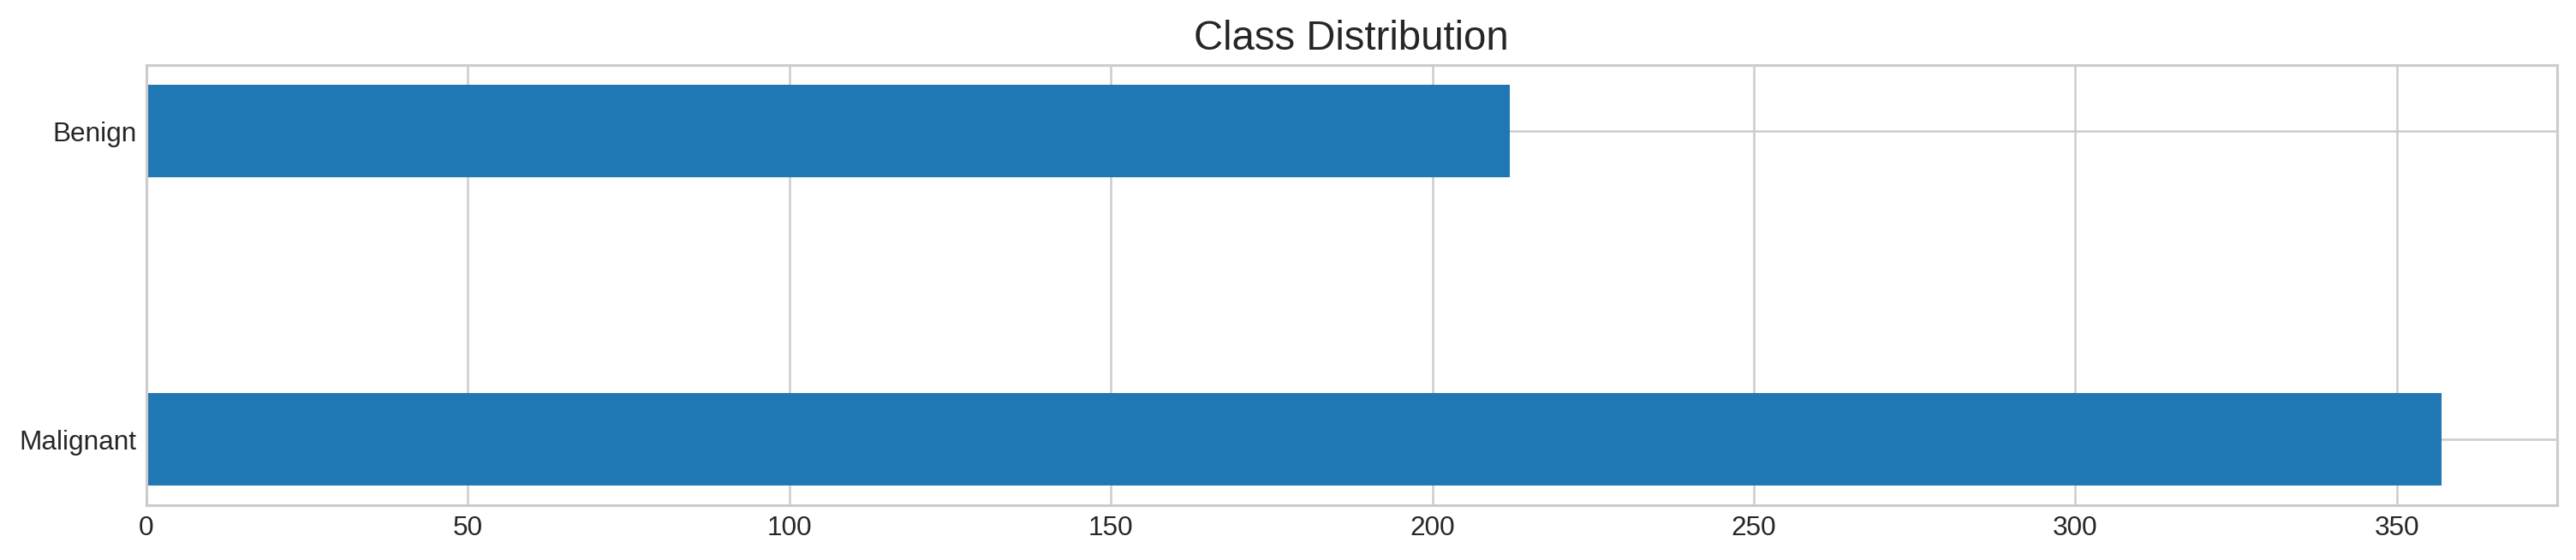

In [7]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution', fontSize=15)
plt.show()

In [8]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Now, we are going to compare our model's performance with the built-in LR model from scikit-learn

In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [11]:
logreg = MY_LogisticRegression()
logreg.fit(X_train, y_train, epochs=10000, lr=0.01)
y_pred = logreg.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

-------------------------------------------------------
Confusion Matrix

[[50  4]
 [ 2 87]]


In [13]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
scikit_preidct = lr_model.predict(X_test)

In [14]:
print(classification_report(y_test, scikit_preidct))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, scikit_preidct))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

-------------------------------------------------------
Confusion Matrix

[[52  2]
 [ 0 89]]


So our model achieves a prediction accuracy of about 95-96%, while scikit-learn's model achieves a 99% accuracy.